<a href="https://colab.research.google.com/github/vishal2develop/Deep-Learning/blob/master/BankNoteDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Note Detection

## **Data Description**

1.   VWTI: Variance of Wavelet Transformed Image
2.   SWTI: Skewness of Wavelet Transformed Image
3.   CWTI: Curtosis of Wavelet Transformed Image
4.   EI: Entropy of Image
5.   Class: Class (1: genuine, 0: forged)

**Note: Here the target column is deliberately not there as you need to predict it.**

### **Acknowledgement**
The dataset is downloaded from the UCI Machine Learning Repository.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential # type of model
from tensorflow.keras import layers # for neural network layer addition

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model

In [3]:
bank_note_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/training_set_label.csv" )

In [4]:
bank_note_data.head()

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.612510,0
1,3.2718,1.7837,2.1161,0.613340,0
2,-3.9411,-12.8792,13.0597,-3.312500,1
3,0.5195,-3.2633,3.0895,-0.984900,0
4,2.5698,-4.4076,5.9856,0.078002,0


In [5]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/testing_set_label.csv')

In [6]:
test_data.head()

,VWTI,SWTI,CWTI,EI
0,-0.40804,0.54214,-0.52725,0.65860
1,-3.71810,-8.50890,12.36300,-0.95518
2,5.50400,10.36710,-4.41300,-4.02110
3,1.68490,8.74890,-1.26410,-1.38580
4,4.74320,2.10860,0.13680,1.65430


In [7]:
corr = bank_note_data.corr()

In [8]:
corr

,VWTI,SWTI,CWTI,EI,Class
VWTI,1.000000,0.279529,-0.386030,0.261549,-0.733766
SWTI,0.279529,1.000000,-0.800012,-0.523369,-0.447665
CWTI,-0.386030,-0.800012,1.000000,0.339566,0.167561
EI,0.261549,-0.523369,0.339566,1.000000,-0.035046
Class,-0.733766,-0.447665,0.167561,-0.035046,1.000000


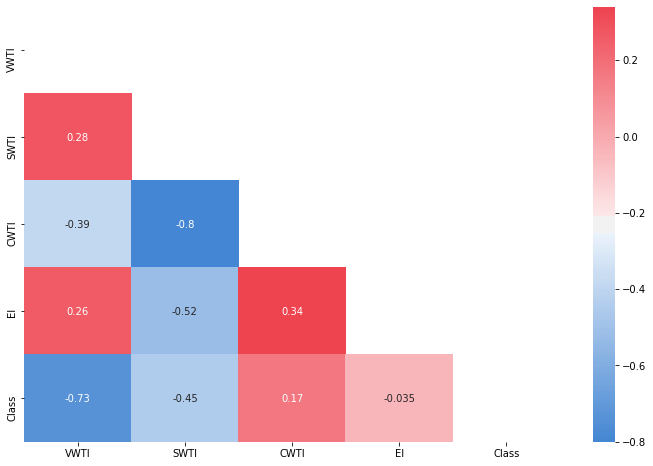

In [9]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the figure
fig, ax = plt.subplots(figsize=(12,8))

# Generate a custom colormap
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio (mask to not display upper triangle part)
sns.heatmap(corr, mask=mask, cmap=cmap, ax=ax, annot=True);
plt.savefig('corr.png')



*   There seems to be a serious -ve correlation between SWTI and CWTI (-0.8)
*   There is also a serious negative correlation between class and VWTI (-0.73)

For starters we will take all the features into consideration and if needed will remove the multi-correlated features like SWTI/CWTI and VWTI



In [11]:
X = bank_note_data.drop('Class',axis=1) # Input Variables
y = bank_note_data.Class # Target variable

In [12]:
X.head()

,VWTI,SWTI,CWTI,EI
0,2.2634,-4.4862,3.6558,-0.612510
1,3.2718,1.7837,2.1161,0.613340
2,-3.9411,-12.8792,13.0597,-3.312500
3,0.5195,-3.2633,3.0895,-0.984900
4,2.5698,-4.4076,5.9856,0.078002


In [13]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Class, dtype: int64

### Split into train and validation set

In [14]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
print("Train Data")
print(X_train.shape)
print(y_train.shape)
print()

print("Validation Data")
print(X_val.shape)
print(y_val.shape)

Train Data
(876, 4)
(876,)

Validation Data
(220, 4)
(220,)


In [16]:
n_features = X_train.shape[1]
n_features

4

### Sequential Model

In [24]:
# Define sequiential model with 3 layers

model = Sequential()
model.add(Dense(64,activation='relu',input_shape = (n_features,)))
model.add(Dense(32,activation='relu',name='layer2'))
model.add(Dense(24,activation='relu',name='layer3'))
model.add(Dense(1,activation='sigmoid',name='layer4'))



### Model Compilation

In [25]:
optimizer = RMSprop(0.001) # learning rate
model.compile(loss = 'binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                320       
_________________________________________________________________
layer2 (Dense)               (None, 32)                2080      
_________________________________________________________________
layer3 (Dense)               (None, 24)                792       
_________________________________________________________________
layer4 (Dense)               (None, 1)                 25        
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


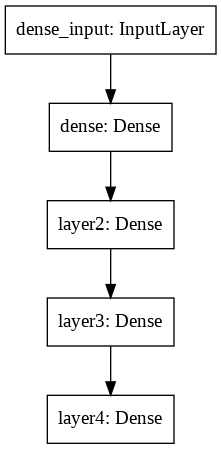

In [20]:
plot_model(model)

In [29]:
from tensorflow.keras.callbacks import TensorBoard # to visulaize the model
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping

In [34]:

## for tensorboard visualisation you can check out the following link: https://youtu.be/Uzkhn5ENJzQ
logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

### Model Training

In [37]:
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=16,epochs=10,verbose=1,callbacks=[tensorboard_callback],)

Epoch 1/10
55/55 [==============================] - 0s 8ms/step - loss: 3.7913e-10 - accuracy: 1.0000 - val_loss: 2.5269e-09 - val_accuracy: 1.0000
Epoch 2/10
55/55 [==============================] - 0s 5ms/step - loss: 3.7775e-10 - accuracy: 1.0000 - val_loss: 2.7866e-09 - val_accuracy: 1.0000
Epoch 3/10
55/55 [==============================] - 0s 6ms/step - loss: 3.8692e-10 - accuracy: 1.0000 - val_loss: 3.1213e-09 - val_accuracy: 1.0000
Epoch 4/10
55/55 [==============================] - 0s 5ms/step - loss: 3.9916e-10 - accuracy: 1.0000 - val_loss: 3.5730e-09 - val_accuracy: 1.0000
Epoch 5/10
55/55 [==============================] - 0s 5ms/step - loss: 4.0993e-10 - accuracy: 1.0000 - val_loss: 1.9821e-09 - val_accuracy: 1.0000
Epoch 6/10
55/55 [==============================] - 0s 5ms/step - loss: 3.3103e-10 - accuracy: 1.0000 - val_loss: 2.0318e-09 - val_accuracy: 1.0000
Epoch 7/10
55/55 [==============================] - 0s 5ms/step - loss: 3.2178e-10 - accuracy: 1.0000 - val_loss

### Trying out Earlystop. Just curious

In [50]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [39]:
from tensorflow.keras.optimizers import SGD

In [45]:
model2 = Sequential()
model2.add(Dense(24,activation='relu',input_shape= (n_features,),name='layer1'))
model2.add(Dense(12,activation='relu',name='layer2'))
model2.add(Dense(6,activation='relu',name='layer3'))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])

In [46]:
logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

In [51]:
training_history = model2.fit(
    X_train, # input
    y_train, # output
    batch_size=32,
    verbose=1, # Suppress chatty output; use Tensorboard instead
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[tensorboard_callback,es],
)

Epoch 1/20
28/28 [==============================] - 0s 7ms/step - loss: 0.0546 - accuracy: 1.0000 - val_loss: 0.0408 - val_accuracy: 1.0000
Epoch 2/20
28/28 [==============================] - 0s 4ms/step - loss: 0.0522 - accuracy: 1.0000 - val_loss: 0.0396 - val_accuracy: 1.0000
Epoch 3/20
28/28 [==============================] - 0s 5ms/step - loss: 0.0500 - accuracy: 1.0000 - val_loss: 0.0373 - val_accuracy: 1.0000
Epoch 4/20
28/28 [==============================] - 0s 5ms/step - loss: 0.0478 - accuracy: 1.0000 - val_loss: 0.0356 - val_accuracy: 1.0000
Epoch 5/20
28/28 [==============================] - 0s 4ms/step - loss: 0.0460 - accuracy: 1.0000 - val_loss: 0.0343 - val_accuracy: 1.0000
Epoch 6/20
28/28 [==============================] - 0s 5ms/step - loss: 0.0441 - accuracy: 1.0000 - val_loss: 0.0328 - val_accuracy: 1.0000
Epoch 7/20
28/28 [==============================] - 0s 6ms/step - loss: 0.0424 - accuracy: 1.0000 - val_loss: 0.0314 - val_accuracy: 1.0000
Epoch 8/20
28/28 [==

### Making Predictions on Test Data

In [53]:
target = model2.predict_classes(test_data)

In [54]:
res = pd.DataFrame(target) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["predictions"]
res.to_csv("prediction_results.csv")      # the csv file will be saved locally on the same location where this notebook is located.